In [1]:
# Incorporating necessary packages.
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
# Handling alerts seemingly as an error but not actually an errors.
import warnings 
warnings.filterwarnings("ignore")

# Handling the plotings so as to be in the NoteBook rather than in a separated windows.
%matplotlib inline 
plt.rcParams["figure.figsize"] = 8, 4 # the width 8 and height of 4 is the out put window.

In [3]:
# File path Definition.
data_path_TrainData = "d:\\Projects\\DataScinece\\Track_02\\train.csv"
data_path_TestData = "d:\\Projects\\DataScinece\\Track_02\\test.csv"

# Reading files using pandas 
TrainData = pd.read_csv(data_path_TrainData,delimiter  = ",")
TestData = pd.read_csv(data_path_TestData,delimiter  = ",")

In [4]:
#Let watch out top few rows of the training data
TrainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
# and the testing data top five rows are:
TestData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
#The statistical properties of the columns of the training data is:
TrainData.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [7]:
# Convert 'Survived' to categorical
TrainData['Survived'] = TrainData['Survived'].astype('category')

In [8]:
# The DataFrame's structure of the Training data is:
TrainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
dtypes: category(1), float64(2), int64(4), object(5)
memory usage: 77.7+ KB


In [9]:
# Check for missing values thus do data cleaning and preprocessing...
print(TrainData.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [10]:
# Since the Age, Cabin and Embarked have a missing values, then I need to fill a value or drop unwanted one.
TrainData['Age'].fillna(TrainData['Age'].median(), inplace=True)
TrainData.drop('Cabin', axis=1, inplace=True)  # If you choose to drop
TrainData['Embarked'].fillna(TrainData['Embarked'].mode()[0], inplace=True)

In [11]:
# Check for missing values
print(TrainData.isnull().sum()) 

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


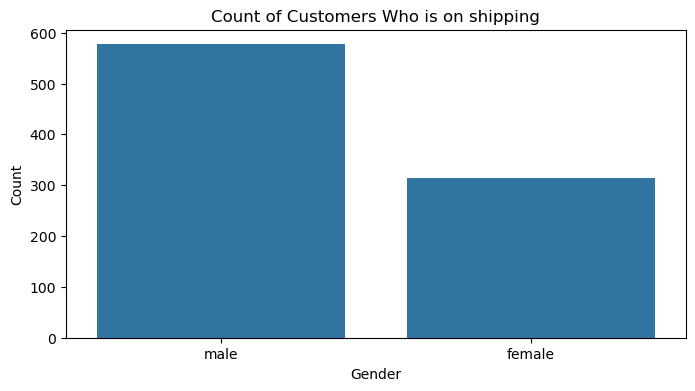

In [12]:
# Exploratory Data Analysis (EDA) on the cleaned and preproced data.
# Visualize the Distribution of Target Variable, the Gender variable in my case
sns.countplot(x='Sex', data=TrainData) 
plt.title('Count of Customers Who is on shipping')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

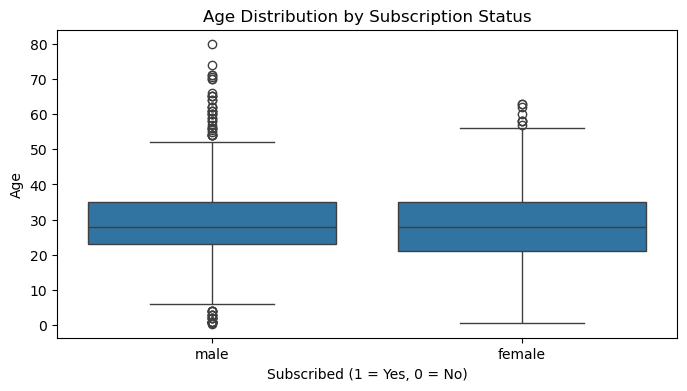

In [13]:
# Analyze relationships between features and the target variable Gender. this helps us to gain insights of pattern and trend observation.
sns.boxplot(x='Sex', y='Age', data=TrainData)
plt.title('Age Distribution by Subscription Status')
plt.xlabel('Subscribed (1 = Yes, 0 = No)')
plt.ylabel('Age')
plt.show()

In [ ]:
# Exploring other relationships 
sns.barplot(x='Pclass', y='Survived', data=TrainData)
plt.title('Survival Rate by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Survival Rate')
plt.show()